### Feedforward NN for MNIST dataset

## Using the Estimator API (formerly `tf.contrib.learn`)
two hidden layers (100,300), ReLU activation f.

In [1]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

Warning: tf.examples.tutorials.mnist is deprecated. We will use tf.keras.datasets.mnist instead. Moreover, the tf.contrib.learn API was promoted to tf.estimators and tf.feature_columns, and it has changed considerably. In particular, there is no infer_real_valued_columns_from_input() function or SKCompat class.

### Load Data

In [11]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

### Quick plot

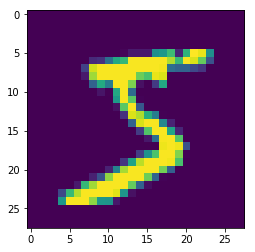

In [18]:
import matplotlib.pyplot as plt
first_array=X_train[0]
#Not sure you even have to do that if you just want to visualize it
#first_array=255*first_array
#first_array=first_array.astype("uint8")
plt.imshow(first_array)
#Actually displaying the plot if you are not in interactive mode
plt.show()
#Saving plot
#plt.savefig("fig.png")

Split into training, validation and test set, reshape data

In [27]:
X_train.shape

(55000, 784)

In [19]:
#convert each element of list to one long vector of length 28*28=784
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
#numbers 1 to 10
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

### Define the parameters of DNN + train on training data set

In [ ]:
feature_cols = [tf.feature_column.numeric_column("X", shape=[28 * 28])]
dnn_clf = tf.estimator.DNNClassifier(hidden_units=[300,100], n_classes=10,
                                     feature_columns=feature_cols)

#1) Steps - number of times the training loop in your learning algorithm will run to update the parameters in the model. In each loop iteration, 
#it will process a chunk of data, which is basically a batch. Usually, this loop is based on the Gradient Descent algorithm.
#one training step is one iteration of gradient descent learning algorithm. Since nobody uses plain gradient descent anymore, it will be some sort
#of stochastic variation of it, so the input for it will be a batch, not a single item. In your example the batch is 4 training examples.
#So with a 1000 steps it will train on a 1000 batches of 4.
#2) Batch size - the size of the chunk of data you feed in each loop of the learning algorithm. You can feed the whole data set, 
#in which case the batch size is equal to the data set size.You can also feed one example at a time. Or you can feed some number N of examples.
#3) Epoch - the number of times you run over the data set extracting batches to feed the learning algorithm.
#steps_cal = (no of ex / batch_size) * no_of_epochs, (55000/50)*40 = 44000
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, num_epochs=40, batch_size=50, shuffle=True)
dnn_clf.train(input_fn=input_fn)

### Evaluate results

In [8]:
test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_test}, y=y_test, shuffle=False)
eval_results = dnn_clf.evaluate(input_fn=test_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-11-13:58:31
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Arturo\AppData\Local\Temp\tmpwsnms6ow\model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-04-11-13:58:39
INFO:tensorflow:Saving dict for global step 44000: accuracy = 0.9813, average_loss = 0.0958014, global_step = 44000, loss = 12.12676
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 44000: C:\Users\Arturo\AppData\Local\Temp\tmpwsnms6ow\model.ckpt-44000


In [9]:
eval_results

{'accuracy': 0.9813,
 'average_loss': 0.0958014,
 'loss': 12.12676,
 'global_step': 44000}

In [10]:
y_pred_iter = dnn_clf.predict(input_fn=test_input_fn)
y_pred = list(y_pred_iter)
y_pred[0]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Arturo\AppData\Local\Temp\tmpwsnms6ow\model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


{'logits': array([ -6.657023 ,  -2.8783622,  -2.2872634,   3.2164893,  -2.0615287,
         -9.680111 , -21.587425 ,  21.955544 ,  -7.6112013,   1.8116527],
       dtype=float32),
 'probabilities': array([3.7473174e-13, 1.6397272e-11, 2.9613006e-11, 7.2733144e-09,
        3.7112296e-11, 1.8230971e-14, 1.2289350e-19, 1.0000000e+00,
        1.4431964e-13, 1.7849233e-09], dtype=float32),
 'class_ids': array([7], dtype=int64),
 'classes': array([b'7'], dtype=object)}

### Create model for client bags classification:

In [40]:
#load the data
import pandas as pd
import os
import category_encoders as ce
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
cwd = os.getcwd()
bags_booking_data = pd.read_csv(cwd+'\\trash\\bags_classification_data.csv')
bags_booking_data = pd.read_csv('\\Users\\Arturo\\Documents\\data\\bags_classification_data.csv')

In [48]:
col_target = 'id_bag'
cols_numerical = ["seats", "km", "passengers", "antel_compra", "trip_duration", "weekend_trip", "family_trip", "couple_trip", 
                 "festivity", 'price_anc', 'price_comp', 'price_ticket', 'id_competitors', 'price_vs_competitors', 'price_vs_ticket', 'id_one_way'] #, route, hour
cols_numerical = ["km", "passengers", "antel_compra", "trip_duration", "weekend_trip", "family_trip", "couple_trip", 
                 "festivity", 'price_anc', 'price_comp', 'price_ticket', 'id_competitors']
cols_cyclical_in = ['dt_flight_month', 'dt_booking_month']
cols_categorical = ["season", "RT_OW", "cluster_micro", "cluster_macro", "dt_flight_dow", "dt_booking_dow", "seats"] #class
#cols_categorical = ["season", "RT_OW", "cluster_macro", "dt_flight_dow", "family_fare"]
#cols_ohe_out = [s + '_catVec' for s in cols_ohe_in]
cols_variables_sin = [s + '_sin' for s in cols_cyclical_in]
cols_variables_cos = [s + '_cos' for s in cols_cyclical_in]
cols_cyclical_out = cols_variables_sin+cols_variables_cos
cols_numerical = cols_numerical+cols_cyclical_out

#### Cyclical variables are already made, now OHE

In [89]:
#ohe = ce.OneHotEncoder(handle_unknown='ignore', use_cat_names=True, cols=cols_categorical)
pipeline_ohe = Pipeline([('enkodowanie', ce.OneHotEncoder(handle_unknown='ignore', use_cat_names=True, cols=cols_categorical))])
pipeline_ohe = pipeline_ohe.fit(bags_booking_data)
data_ohe = pipeline_ohe.transform(bags_booking_data)

cols_ohe_out = list(set(list(data_ohe.columns)) - set(list(bags_booking_data.columns)))
cols_features_full = cols_numerical+cols_ohe_out
data = data_ohe.loc[:,cols_features_full+[col_target]]

#ad-hoc
#cols_features_full = cols_ohe_out

### Split into training, validation and test sets

In [90]:
# create training and testing vars
X = data[cols_features_full]
y = data[col_target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1033051, 73) (1033051,)
(258263, 73) (258263,)


In [91]:
X_train = np.array(X_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)
X_valid, X_train = X_train[:100000], X_train[100000:]
y_valid, y_train = y_train[:100000], y_train[100000:]

### Scale the inputs to mean 0 and standard deviation 1:
You are not required to normalize your data, but normalization can make learning process faster. See this question for more details.

In [104]:
means = X_train.mean(axis=0, keepdims=True)
stds = X_train.std(axis=0, keepdims=True) + 1e-10
X_train = (X_train - means) / stds
X_test = (X_test - means) / stds
X_valid = (X_valid - means) / stds

In [110]:
feature_cols = [tf.feature_column.numeric_column("X", shape=[len(cols_features_full)])]
dnn_clf1 = tf.estimator.DNNClassifier(hidden_units=[50,30,10], n_classes=2,
                                     feature_columns=feature_cols)

#1) Steps - number of times the training loop in your learning algorithm will run to update the parameters in the model. In each loop iteration, 
#it will process a chunk of data, which is basically a batch. Usually, this loop is based on the Gradient Descent algorithm.
#one training step is one iteration of gradient descent learning algorithm. Since nobody uses plain gradient descent anymore, it will be some sort
#of stochastic variation of it, so the input for it will be a batch, not a single item. In your example the batch is 4 training examples.
#So with a 1000 steps it will train on a 1000 batches of 4.
#2) Batch size - the size of the chunk of data you feed in each loop of the learning algorithm. You can feed the whole data set, 
#in which case the batch size is equal to the data set size.You can also feed one example at a time. Or you can feed some number N of examples.
#3) Epoch - the number of times you run over the data set extracting batches to feed the learning algorithm.
#steps_cal = (no of ex / batch_size) * no_of_epochs, (1033051/1000)*40 = 41000
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, num_epochs=40, batch_size=1000, shuffle=True)
dnn_clf1.train(input_fn=input_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Arturo\\AppData\\Local\\Temp\\tmphjmn3cqu', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001DD0118A208>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 in

In [111]:
test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_test}, y=y_test, shuffle=False)
eval_results = dnn_clf1.evaluate(input_fn=test_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-11-17:12:33
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Arturo\AppData\Local\Temp\tmphjmn3cqu\model.ckpt-37323
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-04-11-17:12:43
INFO:tensorflow:Saving dict for global step 37323: accuracy = 0.86172235, accuracy_baseline = 0.8609247, auc = 0.7392294, auc_precision_recall = 0.32243302, average_loss = 0.35731235, global_step = 37323, label/mean = 0.13907528, loss = 45.72872, precision = 0.52917844, prediction/mean = 0.13977803, recall = 0.05200735
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 37323: C:\Users\Arturo\AppData\Local\Temp\tmphjmn3cqu\model.ckpt-37323


In [112]:
eval_results

{'accuracy': 0.86172235,
 'accuracy_baseline': 0.8609247,
 'auc': 0.7392294,
 'auc_precision_recall': 0.32243302,
 'average_loss': 0.35731235,
 'label/mean': 0.13907528,
 'loss': 45.72872,
 'precision': 0.52917844,
 'prediction/mean': 0.13977803,
 'recall': 0.05200735,
 'global_step': 37323}

In [88]:
y_pred_iter = dnn_clf.predict(input_fn=test_input_fn)
y_pred = list(y_pred_iter)
y_pred[0]

INFO:tensorflow:Could not find trained model in model_dir: C:\Users\Arturo\AppData\Local\Temp\tmp7ac_ezrl, running initialization to predict.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


{'logits': array([0.1651174], dtype=float32),
 'logistic': array([0.5411858], dtype=float32),
 'probabilities': array([0.45881417, 0.5411858 ], dtype=float32),
 'class_ids': array([1], dtype=int64),
 'classes': array([b'1'], dtype=object)}